In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/maria/Documents/UFAL/Ciencia de dados/Projeto/data/APOSENTADOS_112020_FULL.csv',low_memory=False, error_bad_lines=False, sep=';')

#Tratamento dos dados
#Drop colunas que não vão ser usadas
aposentados = df.drop(['Nome', 'CPF', 'Matricula', 'Sigla Orgao', 'Orgao vinculacao', 'Padrao',
        'Referencia', 'Nivel', 'Fund legal aposentadoria', 'Portaria aposentadoria'], axis=1)

# Tirando datas vazias
aposentados.drop(aposentados[aposentados['Dt ocorrencia inatividade'] == '        '].index, inplace = True)
aposentados.drop(aposentados[aposentados['Dt ingresso servico publico'] == '        '].index, inplace = True)

# Transformar data Dt ocorrencia inatividade; Dt ingresso servico publico; em tipo date %d%m%Y
aposentados['Dt ocorrencia inatividade'] = pd.to_datetime(aposentados['Dt ocorrencia inatividade'],format="%d%m%Y")
aposentados['Dt ingresso servico publico'] = pd.to_datetime(aposentados['Dt ingresso servico publico'],format="%d%m%Y")



Matplotlib is building the font cache; this may take a moment.
b'Skipping line 2244: expected 18 fields, saw 19\nSkipping line 21668: expected 18 fields, saw 19\nSkipping line 27415: expected 18 fields, saw 19\nSkipping line 31601: expected 18 fields, saw 19\nSkipping line 31615: expected 18 fields, saw 19\nSkipping line 31628: expected 18 fields, saw 19\nSkipping line 31651: expected 18 fields, saw 19\nSkipping line 31652: expected 18 fields, saw 19\nSkipping line 31661: expected 18 fields, saw 19\nSkipping line 31685: expected 18 fields, saw 19\nSkipping line 31704: expected 18 fields, saw 19\nSkipping line 31722: expected 18 fields, saw 19\nSkipping line 32853: expected 18 fields, saw 19\nSkipping line 34671: expected 18 fields, saw 19\nSkipping line 35164: expected 18 fields, saw 19\nSkipping line 35252: expected 18 fields, saw 19\nSkipping line 35697: expected 18 fields, saw 19\nSkipping line 35701: expected 18 fields, saw 19\nSkipping line 36267: expected 18 fields, saw 19\nSkipp

In [69]:
#Coletando informações necessárias para os plots

# Tipos de aposentadorias apresentadas
tipo_aposentadoria = aposentados['Tipo aposentadoria'].value_counts()

# Selecionando apenas os registros de aposentadoria por invalidez
tipo_invalidez = aposentados.loc[aposentados['Tipo aposentadoria'] == 'APOSENTADORIA POR INVALIDEZ']

#Selecionando os Orgaos que tem aposentadoria por invalidez e contando sua ocorrencia
tipo_invalidez_orgao = tipo_invalidez['Orgao'].value_counts()

# Selecionando os 10 maiores valores para o plot
tipo_invalidez_orgao_maiores = tipo_invalidez_orgao.values[:9]
tipo_invalidez_orgao_maiores_index = tipo_invalidez_orgao.index[:9]

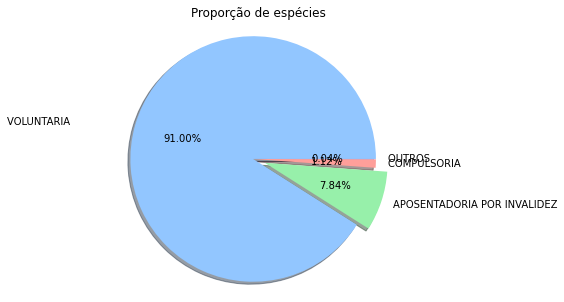

In [16]:
#Criando os gráficos
#Proporção de Tipos de Aposentadorias
plt.figure(figsize=(5,5))
plt.style.use('seaborn-pastel')
plt.title('Proporção de espécies')
explode = (0, 0.1, 0, 0)
plt.pie(x=tipo_aposentadoria.values,explode=explode,
        labels = tipo_aposentadoria.index, autopct='%1.2f%%',
       shadow=True)
plt.axis('equal')
plt.show()

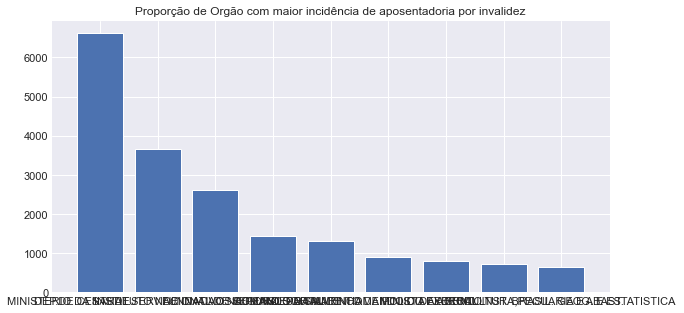

In [70]:
#Grafico que apresenta a quantidade de aposentadoria por invalidez
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.bar(tipo_invalidez_orgao_maiores_index,tipo_invalidez_orgao_maiores)
plt.title('Proporção de Orgão com maior incidência de aposentadoria por invalidez')
plt.show()